1.loading the text file into the pandas dataframe and providing the headers for dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#loading the data from text file to the pandas dataframe
df = pd.read_table('C:/Users/saikiran/Desktop/ecoli.txt', delim_whitespace=True, names=('Sequence Name', 'mcg', 'gvh', 'lip', 'chg', ' aac', 'alm1', 'alm2', 'class'))                  
print(df)

    Sequence Name   mcg   gvh   lip  chg   aac  alm1  alm2 class
0       AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1      ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2      ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3      ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4       ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp
5      ALKH_ECOLI  0.67  0.39  0.48  0.5  0.36  0.38  0.46    cp
6      AMPD_ECOLI  0.29  0.28  0.48  0.5  0.44  0.23  0.34    cp
7      AMY2_ECOLI  0.21  0.34  0.48  0.5  0.51  0.28  0.39    cp
8       APT_ECOLI  0.20  0.44  0.48  0.5  0.46  0.51  0.57    cp
9      ARAC_ECOLI  0.42  0.40  0.48  0.5  0.56  0.18  0.30    cp
10     ASG1_ECOLI  0.42  0.24  0.48  0.5  0.57  0.27  0.37    cp
11     BTUR_ECOLI  0.25  0.48  0.48  0.5  0.44  0.17  0.29    cp
12     CAFA_ECOLI  0.39  0.32  0.48  0.5  0.46  0.24  0.35    cp
13     CAIB_ECOLI  0.51  0.50  0.48  0.5  0.46  0.32  0.35    cp
14      CFA_ECOLI  0.22  

2.Finding the means of all the columns in the dataframe.

In [2]:
mean = df.mean(axis=0)
print(mean)



mcg     0.500060
gvh     0.500000
lip     0.495476
chg     0.501488
 aac    0.500030
alm1    0.500179
alm2    0.499732
dtype: float64


3.Grouping the data frame using class column and finding the average (mean) of mcg, gvh, alm2 respective to each class type

In [3]:
data = df.groupby(['class'])['mcg','gvh','alm2'].mean()
print(data)

            mcg       gvh      alm2
class                              
cp     0.363566  0.409720  0.395245
im     0.478442  0.496623  0.730390
imL    0.725000  0.470000  0.570000
imS    0.740000  0.510000  0.570000
imU    0.726000  0.458857  0.748000
om     0.672500  0.710000  0.305500
omL    0.698000  0.512000  0.222000
pp     0.652115  0.699808  0.374423


4.plotting the boxplot for the  average of mcg,gvh and alm2 for each class type

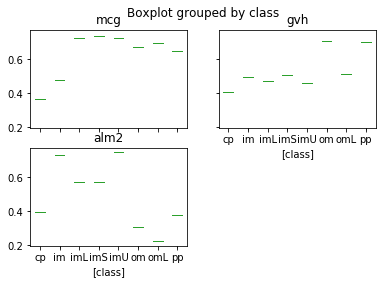

In [4]:
data.boxplot(column = (['mcg', 'gvh', 'alm2']), by = (['class']), grid=False, whis='range')
plt.show()


5.Finding the predicted line of mcg vs chg for 'im' class

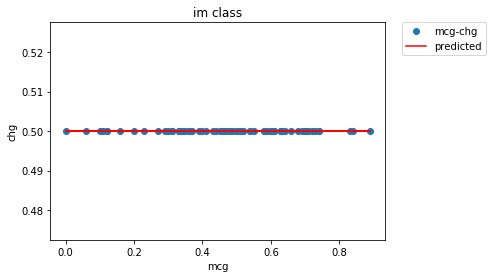

In [5]:
data = df[['class','mcg','chg']].copy()
#taking a copy of dataframe and matching the class name with 'im' in order to find the predicted line for that class
df2 = data.loc[data['class']=='im']
#solving for the linear regression and find the predicted line
X = df2[['mcg']].values
Y = df2[['chg']].values
x_mean = np.mean(X)
y_mean = np.mean(Y)
#initializing the XY_total and X_total to compute beta0 and beta1 values
XY_total = 0
X_total = 0
Y_Predict = []
for i in range(len(X)):
    #for each i in length of X it does the following operation
    product = ((X[i] - x_mean) * (Y[i] - y_mean))
    x_summation = ((X[i] - x_mean)**2)
    XY_total = XY_total + product
    X_total = X_total + x_summation

beta1 = XY_total/X_total
beta0 = (y_mean - (beta1 * x_mean))

for i in range(len(X)):
    Y_Predict = np.append(Y_Predict,(beta0 + (beta1 * X[i])))
x = df2.mcg.values
y = df2.chg.values


plt.plot(x,y,'o',label="mcg-chg")
plt.plot(x,Y_Predict,'r',label = "predicted")
plt.title("im class")
#Label the X and Y axes
plt.xlabel("mcg")
plt.ylabel("chg")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()




6.Finding the predicted line of mcg vs chg for 'cp' class

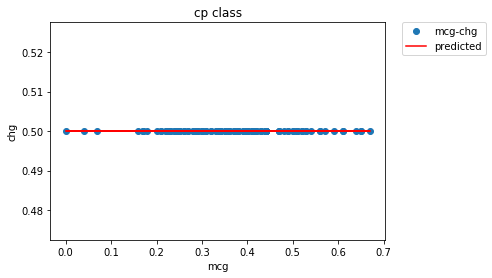

In [6]:
data = df[['class','mcg','chg']].copy()
#taking a copy of dataframe and matching the class name with 'cp' in order to find the predicted line for that class
df2 = data.loc[data['class']=='cp']
X = df2[['mcg']].values
Y = df2[['chg']].values
#solving for the linear regression and find the predicted line
x_mean = np.mean(X)
y_mean = np.mean(Y)
#initializing the XY_total and X_total to compute beta0 and beta1 values
XY_total = 0
X_total = 0
Y_Predict = []
for i in range(len(X)):
    #for each i in length of X it does the following operation
    product = ((X[i] - x_mean) * (Y[i] - y_mean))
    x_summation = ((X[i] - x_mean)**2)
    XY_total = XY_total + product
    X_total = X_total + x_summation

beta1 = XY_total/X_total
beta0 = (y_mean - (beta1 * x_mean))

for i in range(len(X)):
    Y_Predict = np.append(Y_Predict,(beta0 + (beta1 * X[i])))
x = df2.mcg.values
y = df2.chg.values


plt.plot(x,y,'o',label="mcg-chg")
plt.plot(x,Y_Predict,'r',label = "predicted")
plt.title("cp class")
#Label the X and Y axes
plt.xlabel("mcg")
plt.ylabel("chg")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()




7.Finding the predicted line of mcg vs chg for 'imL' class

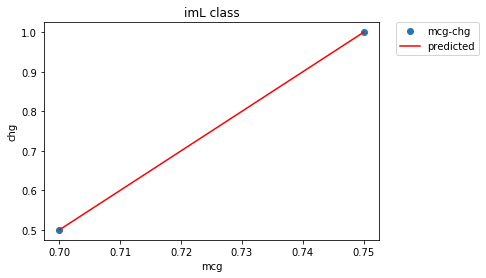

In [7]:
data = df[['class','mcg','chg']].copy()
df2 = data.loc[data['class']=='imL']
X = df2[['mcg']].values
Y = df2[['chg']].values
x_mean = np.mean(X)
y_mean = np.mean(Y)
#initializing the XY_total and X_total to compute beta0 and beta1 values
XY_total = 0
X_total = 0
Y_Predict = []
for i in range(len(X)):
    #for each i in length of X it does the following operation
    product = ((X[i] - x_mean) * (Y[i] - y_mean))
    x_summation = ((X[i] - x_mean)**2)
    XY_total = XY_total + product
    X_total = X_total + x_summation

beta1 = XY_total/X_total
beta0 = (y_mean - (beta1 * x_mean))

for i in range(len(X)):
    Y_Predict = np.append(Y_Predict,(beta0 + (beta1 * X[i])))
x = df2.mcg.values
y = df2.chg.values


plt.plot(x,y,'o',label="mcg-chg")
plt.plot(x,Y_Predict,'r',label = "predicted")
plt.title("imL class")
#Label the X and Y axes
plt.xlabel("mcg")
plt.ylabel("chg")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()




8.Finding the predicted line of mcg vs chg for 'imS' class

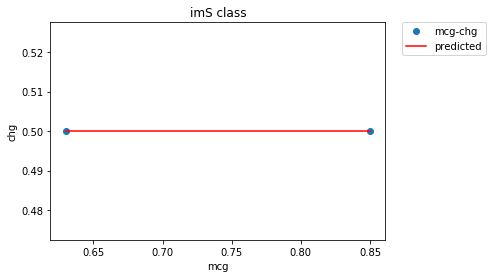

In [8]:
data = df[['class','mcg','chg']].copy()
df2 = data.loc[data['class']=='imS']
X = df2[['mcg']].values
Y = df2[['chg']].values
x_mean = np.mean(X)
y_mean = np.mean(Y)
#initializing the XY_total and X_total to compute beta0 and beta1 values
XY_total = 0
X_total = 0
Y_Predict = []
for i in range(len(X)):
    #for each i in length of X it does the following operation
    product = ((X[i] - x_mean) * (Y[i] - y_mean))
    x_summation = ((X[i] - x_mean)**2)
    XY_total = XY_total + product
    X_total = X_total + x_summation

beta1 = XY_total/X_total
beta0 = (y_mean - (beta1 * x_mean))

for i in range(len(X)):
    Y_Predict = np.append(Y_Predict,(beta0 + (beta1 * X[i])))
x = df2.mcg.values
y = df2.chg.values


plt.plot(x,y,'o',label="mcg-chg")
plt.plot(x,Y_Predict,'r',label = "predicted")
plt.title("imS class")
#Label the X and Y axes
plt.xlabel("mcg")
plt.ylabel("chg")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()




8.Finding the predicted line of mcg vs chg for 'imU' class

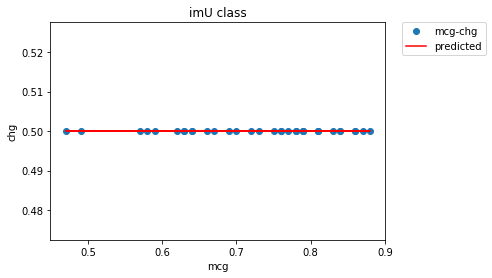

In [9]:
data = df[['class','mcg','chg']].copy()
df2 = data.loc[data['class']=='imU']
X = df2[['mcg']].values
Y = df2[['chg']].values
x_mean = np.mean(X)
y_mean = np.mean(Y)
#initializing the XY_total and X_total to compute beta0 and beta1 values
XY_total = 0
X_total = 0
Y_Predict = []
for i in range(len(X)):
    #for each i in length of X it does the following operation
    product = ((X[i] - x_mean) * (Y[i] - y_mean))
    x_summation = ((X[i] - x_mean)**2)
    XY_total = XY_total + product
    X_total = X_total + x_summation

beta1 = XY_total/X_total
beta0 = (y_mean - (beta1 * x_mean))

for i in range(len(X)):
    Y_Predict = np.append(Y_Predict,(beta0 + (beta1 * X[i])))
x = df2.mcg.values
y = df2.chg.values


plt.plot(x,y,'o',label="mcg-chg")
plt.plot(x,Y_Predict,'r',label = "predicted")
plt.title("imU class")
#Label the X and Y axes
plt.xlabel("mcg")
plt.ylabel("chg")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()




9.Finding the predicted line of mcg vs chg for 'om' class

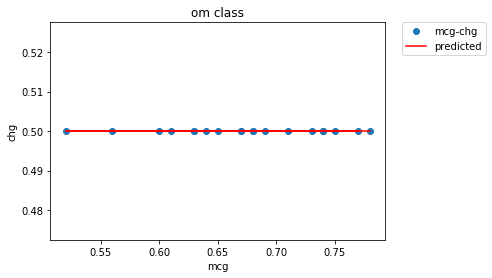

In [10]:
data = df[['class','mcg','chg']].copy()
df2 = data.loc[data['class']=='om']
X = df2[['mcg']].values
Y = df2[['chg']].values
x_mean = np.mean(X)
y_mean = np.mean(Y)
#initializing the XY_total and X_total to compute beta0 and beta1 values
XY_total = 0
X_total = 0
Y_Predict = []
for i in range(len(X)):
    #for each i in length of X it does the following operation
    product = ((X[i] - x_mean) * (Y[i] - y_mean))
    x_summation = ((X[i] - x_mean)**2)
    XY_total = XY_total + product
    X_total = X_total + x_summation

beta1 = XY_total/X_total
beta0 = (y_mean - (beta1 * x_mean))

for i in range(len(X)):
    Y_Predict = np.append(Y_Predict,(beta0 + (beta1 * X[i])))
x = df2.mcg.values
y = df2.chg.values


plt.plot(x,y,'o',label="mcg-chg")
plt.plot(x,Y_Predict,'r',label = "predicted")
plt.title("om class")
#Label the X and Y axes
plt.xlabel("mcg")
plt.ylabel("chg")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()




10.Finding the predicted line of mcg vs chg for 'omL' class

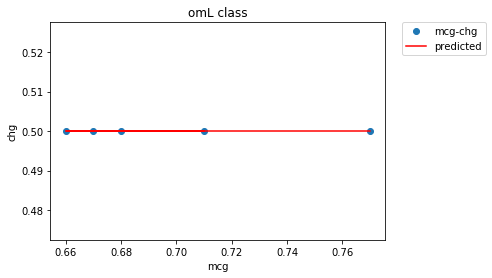

In [11]:
data = df[['class','mcg','chg']].copy()
df2 = data.loc[data['class']=='omL']
X = df2[['mcg']].values
Y = df2[['chg']].values
x_mean = np.mean(X)
y_mean = np.mean(Y)
#initializing the XY_total and X_total to compute beta0 and beta1 values
XY_total = 0
X_total = 0
Y_Predict = []
for i in range(len(X)):
    #for each i in length of X it does the following operation
    product = ((X[i] - x_mean) * (Y[i] - y_mean))
    x_summation = ((X[i] - x_mean)**2)
    XY_total = XY_total + product
    X_total = X_total + x_summation

beta1 = XY_total/X_total
beta0 = (y_mean - (beta1 * x_mean))

for i in range(len(X)):
    Y_Predict = np.append(Y_Predict,(beta0 + (beta1 * X[i])))
x = df2.mcg.values
y = df2.chg.values


plt.plot(x,y,'o',label="mcg-chg")
plt.plot(x,Y_Predict,'r',label = "predicted")
plt.title("omL class")
#Label the X and Y axes
plt.xlabel("mcg")
plt.ylabel("chg")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()




11.Finding the predicted line of mcg vs chg for 'pp' class

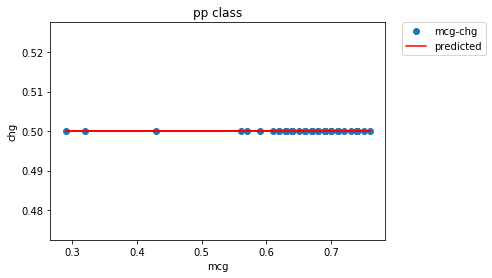

In [12]:
data = df[['class','mcg','chg']].copy()
df2 = data.loc[data['class']=='pp']
X = df2[['mcg']].values
Y = df2[['chg']].values
x_mean = np.mean(X)
y_mean = np.mean(Y)
#initializing the XY_total and X_total to compute beta0 and beta1 values
XY_total = 0
X_total = 0
Y_Predict = []
for i in range(len(X)):
    #for each i in length of X it does the following operation
    product = ((X[i] - x_mean) * (Y[i] - y_mean))
    x_summation = ((X[i] - x_mean)**2)
    XY_total = XY_total + product
    X_total = X_total + x_summation

beta1 = XY_total/X_total
beta0 = (y_mean - (beta1 * x_mean))

for i in range(len(X)):
    Y_Predict = np.append(Y_Predict,(beta0 + (beta1 * X[i])))
x = df2.mcg.values
y = df2.chg.values


plt.plot(x,y,'o',label="mcg-chg")
plt.plot(x,Y_Predict,'r',label = "predicted")
plt.title("pp class")
#Label the X and Y axes
plt.xlabel("mcg")
plt.ylabel("chg")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


